## `Business Understanding`

1. **Alcohol:** The alcohol content of the wine.
2. **Malic acid:** The amount of malic acid in the wine, which can affect the taste and acidity.
3. **Ash:** The ash content in the wine, representing the inorganic content after incineration.
4. **Alcalinity of ash:** The alkalinity of the ash, which can influence the taste and pH of the wine.
5. **Magnesium:** The amount of magnesium in the wine.
6. **Total phenols:** The total amount of phenolic compounds in the wine, which contribute to its flavor and color.
7. **Flavanoids:** The amount of flavonoids in the wine, which are responsible for various sensory attributes.
8. **Nonflavanoid phenols:** The amount of non-flavonoid phenolic compounds in the wine.
9. **Proanthocyanins:** The amount of proanthocyanins, a type of antioxidant, in the wine.
10. **Color intensity:** The color intensity of the wine, which can be influenced by various compounds.
11. **Hue:** The hue of the wine, representing the color shade.
12. **OD280/OD315 of diluted wines:** The optical density of the wine, which is measured at two different wavelengths. It can provide information about the color.
13. **Proline:** The amount of proline, an amino acid, in the wine.

Goal: To build a model that can grade the class of wines for `Alcohol Grading feature` on pur website

- Null: No relationship between alcohot content and class of the wine
- Alernate: There is a relationship between alcohol content and the class of wine


Analytical Question

1. How strong is the correlation between the alcohol content and the acidity
2. Does alcohol affect the hue ot color intensity?

## `Data Understanding`

In [103]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns


### Load Dataset

In [104]:
data = load_wine()

In [105]:
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [106]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [107]:
target = pd.DataFrame(data['target'])
target.head()

,0
0,0
1,0
2,0
3,0
4,0


In [108]:
target[0].unique()

array([0, 1, 2])

### EDA

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [110]:
df.duplicated().sum()

0

In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


### Univariate Analysis

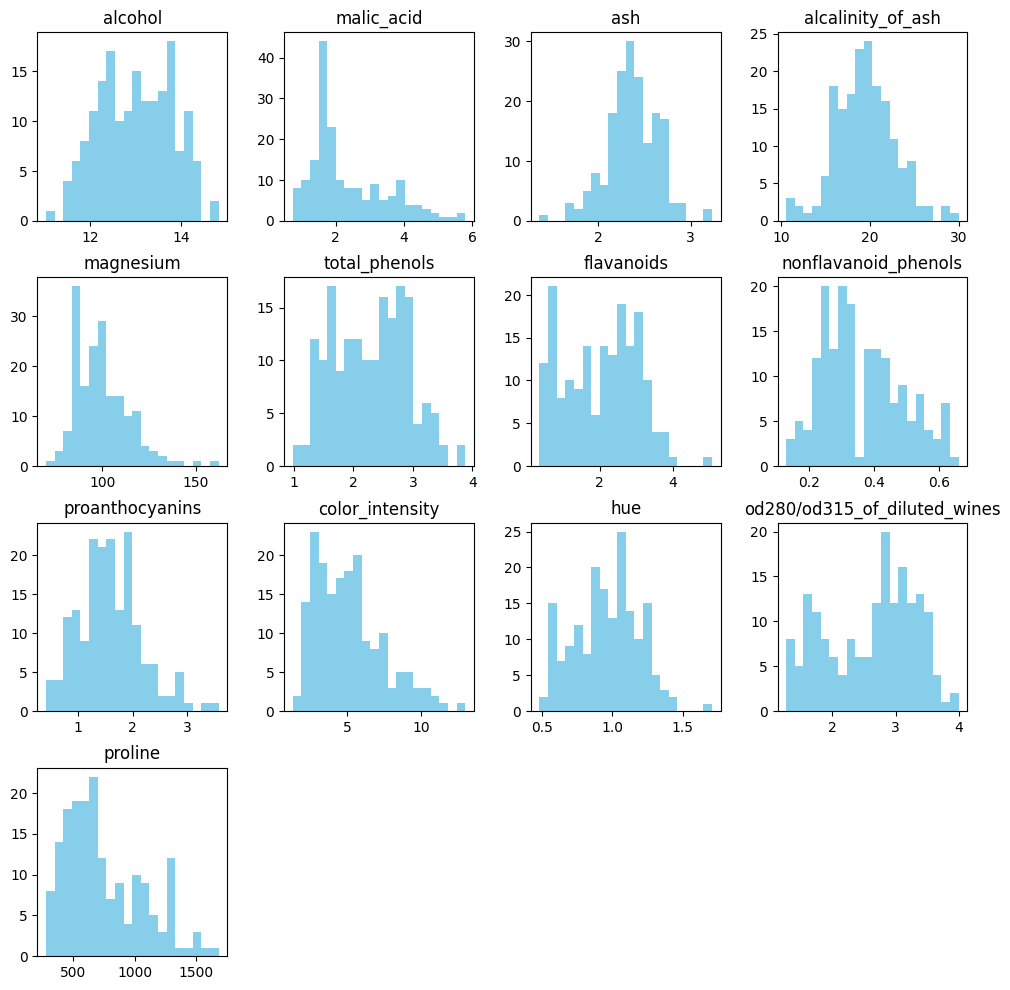

In [112]:
df.hist(figsize=(12, 12), grid=False, bins=20, color='skyblue')
plt.show()

In [113]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

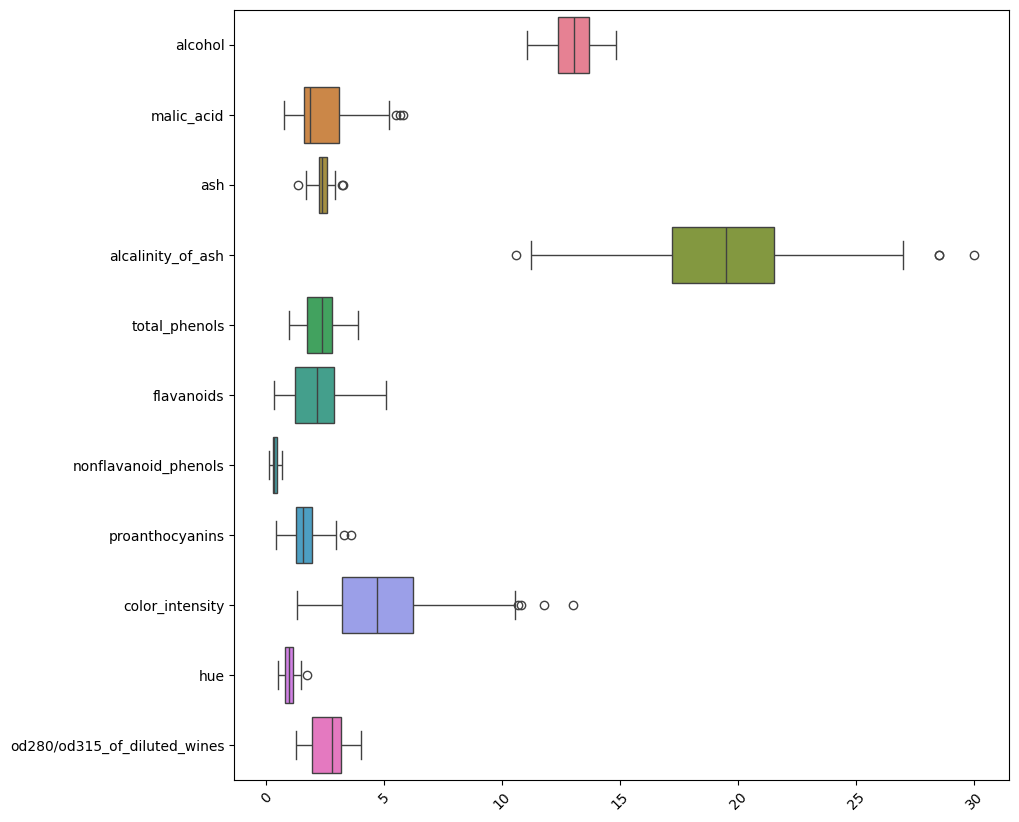

In [114]:
df_without_proline = df.drop(['proline', 'magnesium'], axis=1)
plt.figure(figsize=(10,10))
sns.boxplot(data=df_without_proline, orient='h')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='proline'>

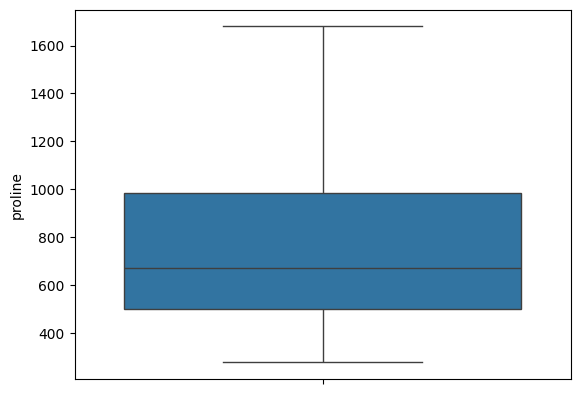

In [115]:
sns.boxplot(data=df['proline'])

<Axes: ylabel='magnesium'>

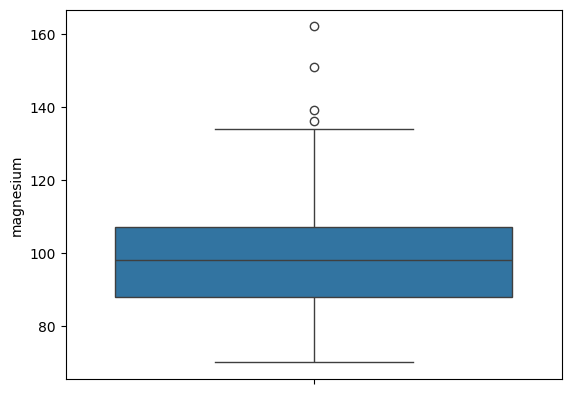

In [116]:
sns.boxplot(data=df['magnesium'])

### Bi-variate Analysis

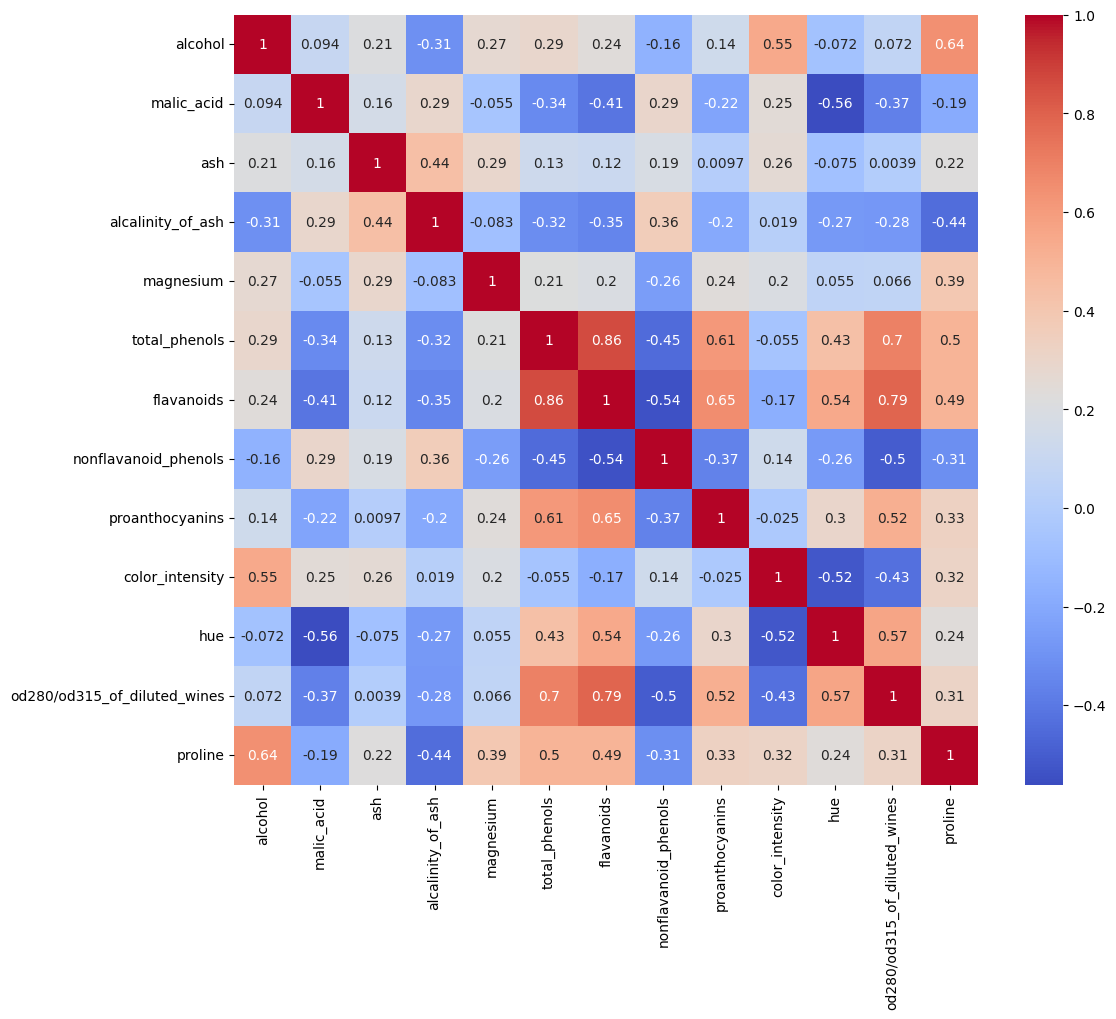

In [117]:
correlation = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

## Multivariate Analysis

In [118]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

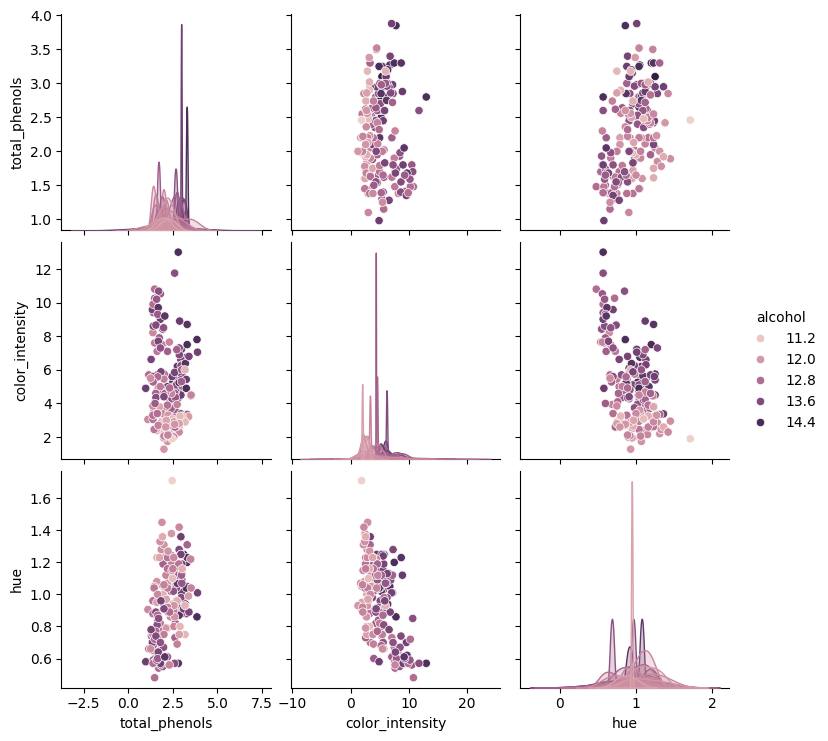

In [119]:
data = df[['total_phenols', 'color_intensity', 'hue', 'alcohol']]
sns.pairplot(data, hue='alcohol')

## `Data Preparation`

In [120]:
X = df

In [121]:
X.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [122]:
target[0].unique()

array([0, 1, 2])

In [123]:
target[0] = target[0].apply(lambda x: 'Grade A' if x == 0 else ('Grade B' if x == 1 else 'Grade C'))

In [124]:
target[0].unique()

array(['Grade A', 'Grade B', 'Grade C'], dtype=object)

In [125]:
type(target[0])

pandas.core.series.Series

In [126]:
y = target[0]

### Create a Pipeline

In [127]:
input_features =  X.columns

In [128]:
from sklearn.compose  import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier


preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), input_features),
        ('log_transformation', FunctionTransformer(np.log1p), input_features),
    ]
)

neighbors = KNeighborsClassifier()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('neighbors', neighbors)
])

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

### Check how balanced data is

In [132]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encode = encoder.transform(y_test)

## `Modeling`

In [133]:
pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')),
                                                 ('log_transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object'))])),
                ('neighbors', KNeighborsClassifier())])

In [134]:
knn_pred = pipeline.predict(X_test)

In [135]:
from sklearn.metrics import classification_report

In [136]:
print(classification_report(y_test_encode, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Persiting the model

In [137]:
import joblib

joblib.dump(pipeline, 'pipeline.joblib')
joblib.dump(encoder, 'encoder.joblib')

['encoder.joblib']